# ADIDAS PRODUCT ANALYSIS

## SMART QUESTION

**What product and retailer exhibited the highest sales growth rate from 2020 to the end of 2021, and what type of Sales method worked best for the company?**

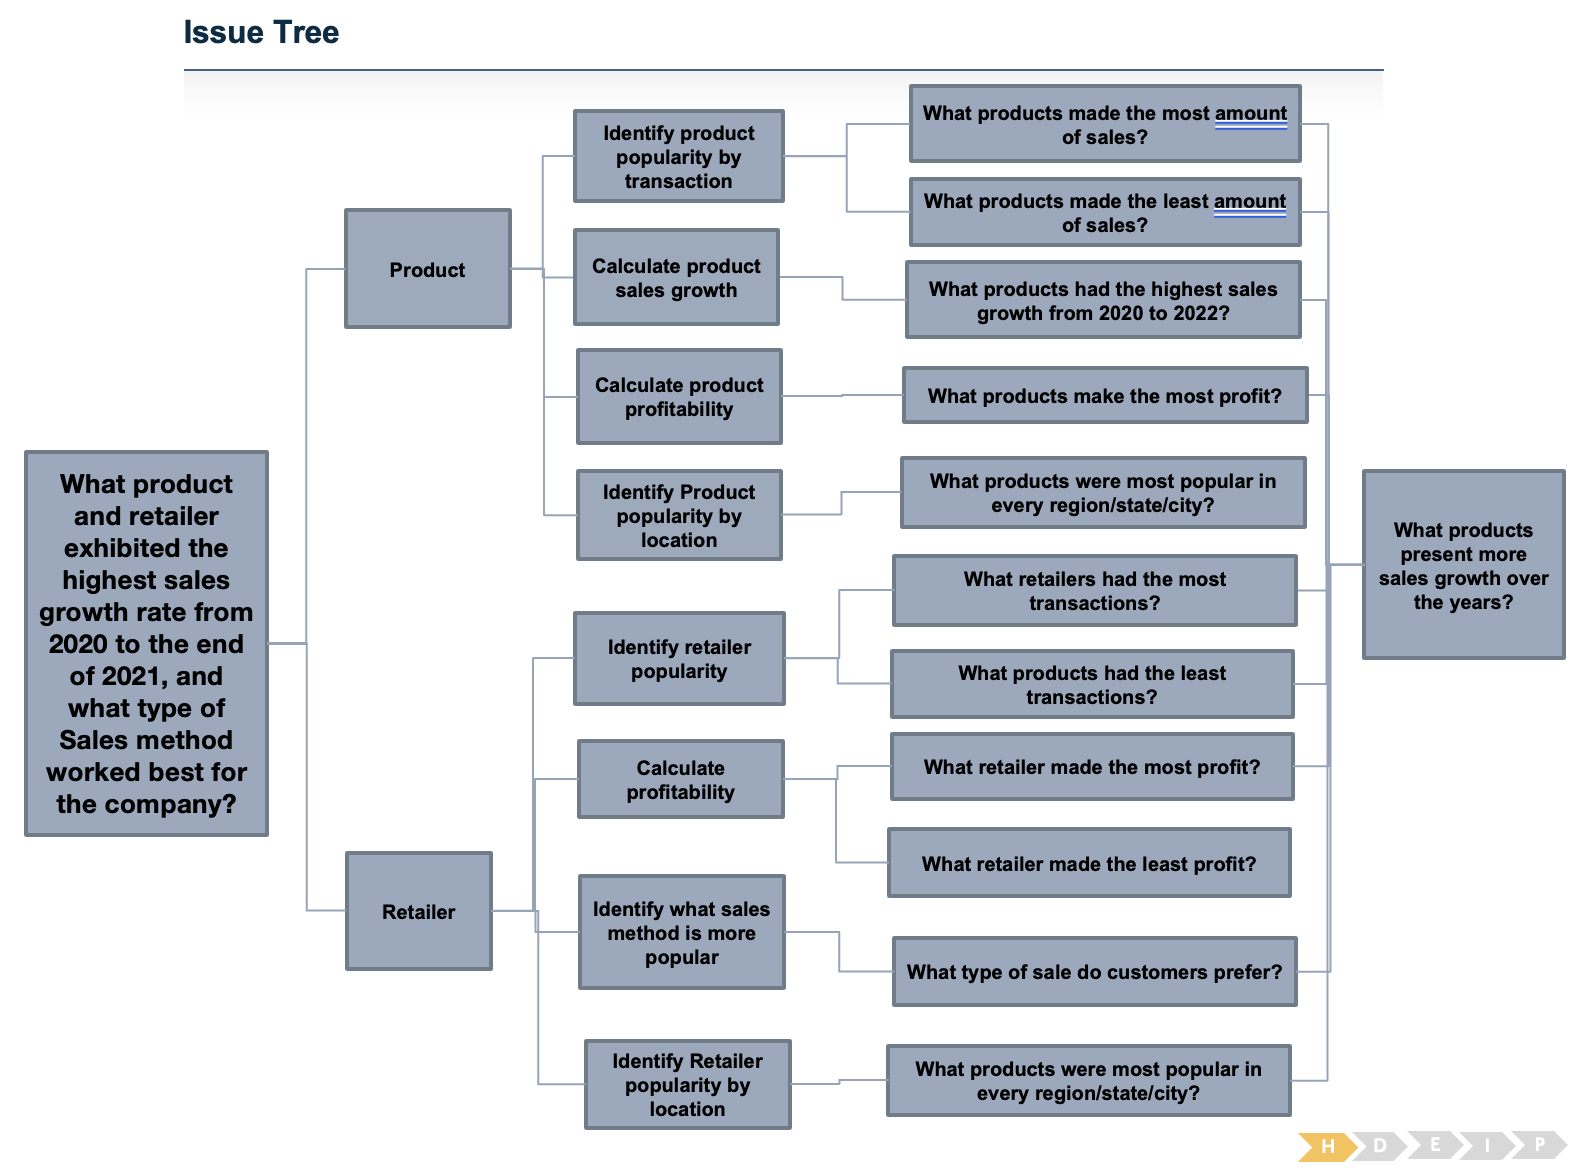

## Libraries needed

For this project I will be using three basic libraries

**Pandas**: for data analysis

**Numpy**: for data structure and mathematical operations

**Matplotlib.pyplot** for data visualization

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import datetime as dt
warnings.filterwarnings('ignore')
plt.style.use("tableau-colorblind10")

# Data exploration/Preparation

In [5]:
df = pd.read_excel("Adidas US Sales Datasets.xlsx", header=4)
df.head()

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,NaN,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,NaN,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,NaN,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,NaN,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,NaN,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [6]:
#to get rid of the first empty column
df = df.drop(df.columns[0],axis=1)
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


Retailer ID has an integer datatype when it's actually a key, so let's fix that chaging it's datatype to a string 

In [8]:
df['Retailer ID'] = df['Retailer ID'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   object        
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 980.0+ KB


Let's see what is the earliest and latest Invoice Date in the dataset

In [9]:
print("Date of earliest entry: ",df['Invoice Date'].min())
print("Date of latest entry: ",df['Invoice Date'].max())

Date of earliest entry:  2020-01-01 00:00:00
Date of latest entry:  2021-12-31 00:00:00


Now checking what locations we have records of

In [10]:
df['Region'].unique()

array(['Northeast', 'South', 'West', 'Midwest', 'Southeast'], dtype=object)

In [11]:
len(df['Product'].unique())

6

## Product Category Analysis

In [12]:
df.groupby('Product')['Total Sales'].agg(['min','max','mean','sum','std','median']).sort_values(by='sum', ascending=False)

,min,max,mean,sum,std,median
Product,,,,,,
Men's Street Footwear,1568.0,810000.0,129705.741615,208826244.0,175202.570293,11055.0
Women's Apparel,910.0,825000.0,111342.574627,179038860.0,161401.616772,11140.5
Men's Athletic Footwear,736.0,712500.0,95449.490683,153673680.0,142842.516444,10025.5
Women's Street Footwear,369.0,665000.0,79603.739428,128002813.0,124076.283054,8821.5
Men's Apparel,252.0,617500.0,77041.489415,123728632.0,119488.604192,7880.5
Women's Athletic Footwear,0.0,540000.0,66395.950187,106631896.0,105902.791572,7291.5


In [13]:
df.groupby('Product')['Units Sold'].agg(['min','max','mean','sum','std','median']).sort_values(by='sum', ascending=False)

,min,max,mean,sum,std,median
Product,,,,,,
Men's Street Footwear,84,1275,368.521739,593320,254.277853,244.0
Men's Athletic Footwear,23,1025,270.513043,435526,216.708762,200.0
Women's Apparel,38,1100,269.792910,433827,208.721351,200.0
Women's Street Footwear,14,1100,243.948383,392269,199.972314,175.0
Women's Athletic Footwear,0,925,197.531756,317236,174.810783,136.0
Men's Apparel,6,925,190.960772,306683,169.997263,135.0


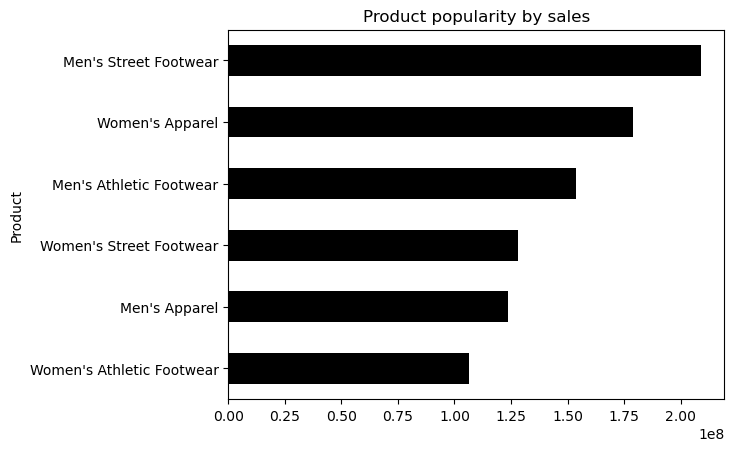

In [16]:
df.groupby('Product')['Total Sales'].sum().sort_values(ascending=True).plot.barh(color='black')
plt.title('Product popularity by sales')
plt.style.use("tableau-colorblind10")
plt.show()

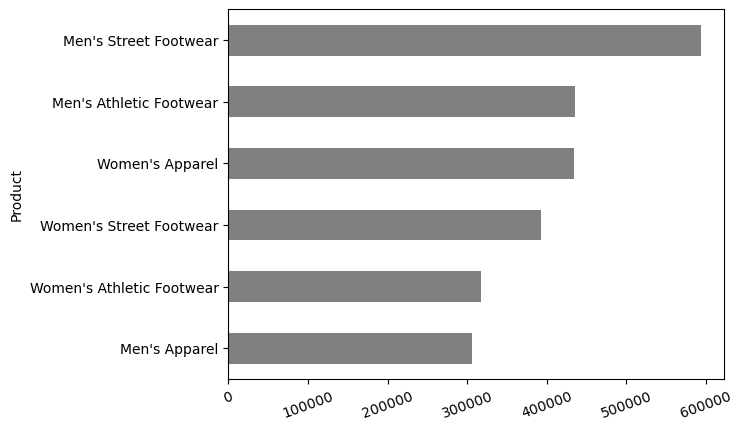

In [29]:
df.groupby(['Product'])['Units Sold'].sum().sort_values(ascending=True).plot.barh(color='gray')
plt.xticks(rotation=20)
plt.show()

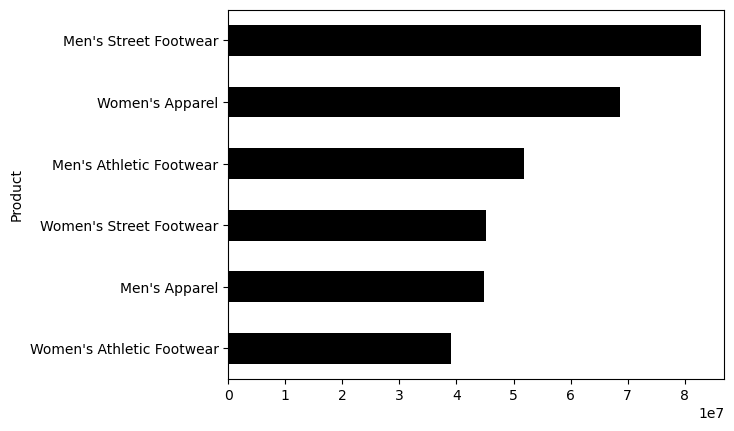

In [28]:
df.groupby(['Product'])['Operating Profit'].sum().sort_values(ascending=True).plot.barh(color='black')
plt.show()

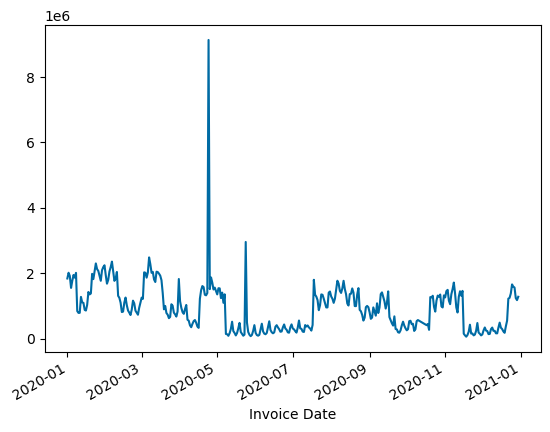

In [38]:
Sales2020 = df.loc[(df['Invoice Date']<'2020-12-31')].reset_index()
Sales2021 = df.loc[(df['Invoice Date']<'2021-12-31')].reset_index()

df.groupby(Sales2020['Invoice Date'])['Total Sales'].sum().sort_values(ascending=False).plot()
plt.show()
